In [1]:
import numpy as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import matplotlib         as mpl
import matplotlib.pyplot  as plt
from mpl_toolkits.mplot3d import Axes3D
from invisible_cities.io import mcinfo_io as mio
from scipy import stats
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

### Analysis of multiple training runs

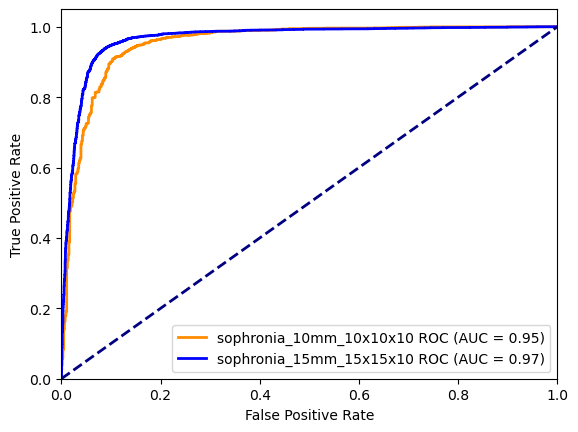

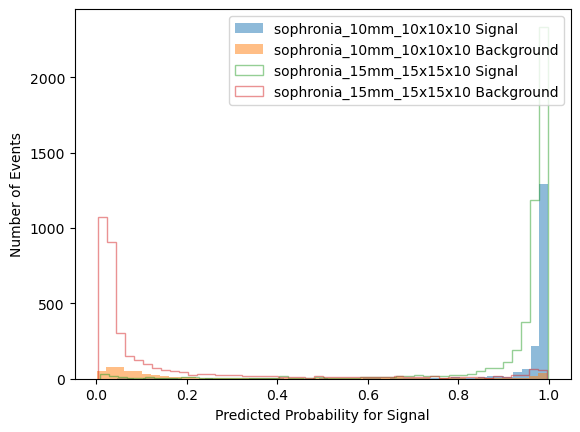

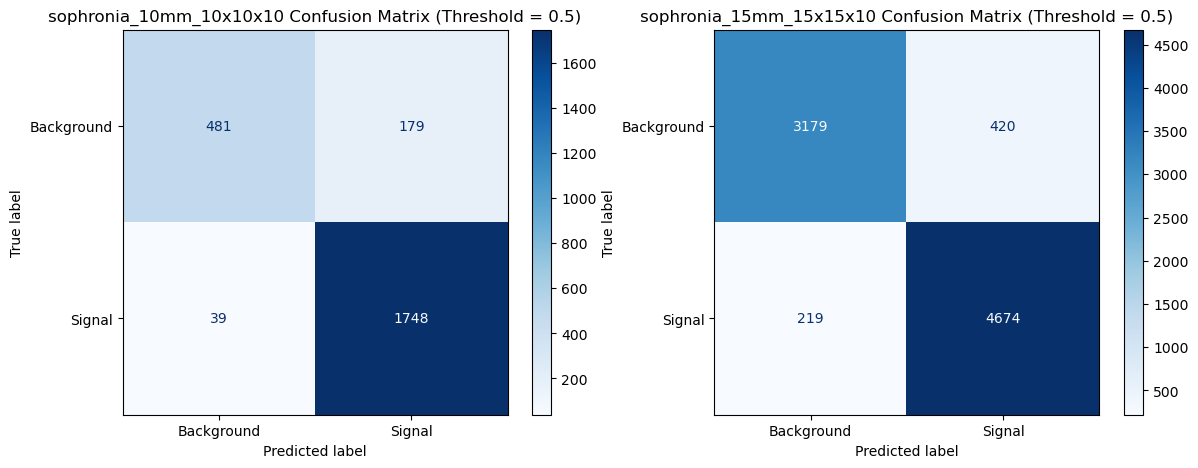

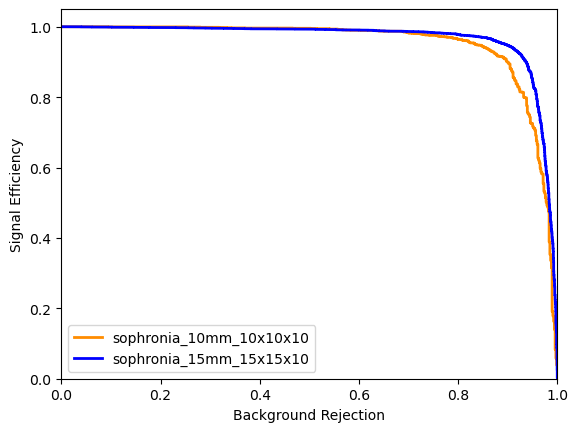

In [4]:
# Load data from a single file
def load_data(filename):
    with tb.open_file(filename, 'r') as h5file:
        data = h5file.root.DATASET.EventPred[:]
        true_labels = data['label']
        probabilities_signal = data['class_1']
        probabilities_background = data['class_0']
    return true_labels, probabilities_signal, probabilities_background

# Plot ROC curves for two runs
def plot_comparative_roc_curve(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2):
    fpr_1, tpr_1, _ = roc_curve(true_labels_1, probabilities_signal_1)
    roc_auc_1 = auc(fpr_1, tpr_1)

    fpr_2, tpr_2, _ = roc_curve(true_labels_2, probabilities_signal_2)
    roc_auc_2 = auc(fpr_2, tpr_2)

    plt.figure()
    plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'{name_1} ROC (AUC = {roc_auc_1:.2f})')
    plt.plot(fpr_2, tpr_2, color='blue', lw=2, label=f'{name_2} ROC (AUC = {roc_auc_2:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Comparative ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Plot probability distributions for two runs
def plot_comparative_probability_distributions(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2):
    plt.figure()
    plt.hist(probabilities_signal_1[true_labels_1 == 1], bins=50, alpha=0.5, label=f'{name_1} Signal')
    plt.hist(probabilities_signal_1[true_labels_1 == 0], bins=50, alpha=0.5, label=f'{name_1} Background')
    plt.hist(probabilities_signal_2[true_labels_2 == 1], bins=50, alpha=0.5, histtype='step', label=f'{name_2} Signal')
    plt.hist(probabilities_signal_2[true_labels_2 == 0], bins=50, alpha=0.5, histtype='step', label=f'{name_2} Background')
    plt.xlabel('Predicted Probability for Signal')
    plt.ylabel('Number of Events')
    #plt.title('Comparative Probability Distributions')
    plt.legend(loc='upper right')
    plt.show()

# Display confusion matrix for two runs at a given threshold
def plot_comparative_confusion_matrices(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2, threshold=0.5):
    predicted_labels_1 = (probabilities_signal_1 >= threshold).astype(int)
    predicted_labels_2 = (probabilities_signal_2 >= threshold).astype(int)

    cm_1 = confusion_matrix(true_labels_1, predicted_labels_1)
    cm_2 = confusion_matrix(true_labels_2, predicted_labels_2)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=['Background', 'Signal']).plot(ax=axs[0], cmap=plt.cm.Blues)
    axs[0].set_title(f'{name_1} Confusion Matrix (Threshold = {threshold})')

    ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['Background', 'Signal']).plot(ax=axs[1], cmap=plt.cm.Blues)
    axs[1].set_title(f'{name_2} Confusion Matrix (Threshold = {threshold})')
    plt.show()
    
# Plot signal efficiency vs. background rejection for two runs
def plot_signal_efficiency_vs_background_rejection(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2):
    fpr_1, tpr_1, _ = roc_curve(true_labels_1, probabilities_signal_1)
    fpr_2, tpr_2, _ = roc_curve(true_labels_2, probabilities_signal_2)

    # Background rejection is 1 - FPR
    background_rejection_1 = 1 - fpr_1
    background_rejection_2 = 1 - fpr_2

    plt.figure()
    plt.plot(background_rejection_1, tpr_1, color='darkorange', lw=2, label=f'{name_1}')
    plt.plot(background_rejection_2, tpr_2, color='blue', lw=2, label=f'{name_2}')
    plt.ylabel('Signal Efficiency')
    plt.xlabel('Background Rejection')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower left")
    #plt.title('Signal Efficiency vs. Background Rejection')
    plt.show()

# Main function to compare two training runs
def compare_runs(filename_1, filename_2, name_1, name_2):
    # Load data for both runs
    true_labels_1, probabilities_signal_1, probabilities_background_1 = load_data(filename_1)
    true_labels_2, probabilities_signal_2, probabilities_background_2 = load_data(filename_2)

    # Comparative ROC curve
    plot_comparative_roc_curve(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2)

    # Comparative probability distributions
    plot_comparative_probability_distributions(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2)

    # Comparative confusion matrices at threshold 0.5
    plot_comparative_confusion_matrices(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2, threshold=0.5)
    
    # Signal Efficiency vs. Background Rejection
    plot_signal_efficiency_vs_background_rejection(true_labels_1, probabilities_signal_1, name_1, true_labels_2, probabilities_signal_2, name_2)

# sensim
# prediction_dataset_1 = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_10mm/tst_file_NEXT100_sensim_10mm.h5'
# prediction_dataset_2 = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_15mm/tst_file_NEXT100_sensim_15mm.h5'
# name_1 = "sensim_10mm_10x10x10.5"
# name_2 = "sensim_15mm_15x15x10.5"
# compare_runs(prediction_dataset_1, prediction_dataset_2, name_1, name_2)


prediction_dataset_1 = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Sophronia_10mm_10x10x10/tst_file_NEXT100_Sophronia_10mm_10x10x10.h5'
prediction_dataset_2 = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Sophronia_15mm_15x15x10/tst_file_NEXT100_Sophronia_15mm_15x15x10.h5'
name_1 = "sophronia_10mm_10x10x10"
name_2 = "sophronia_15mm_15x15x10"
compare_runs(prediction_dataset_1, prediction_dataset_2, name_1, name_2)

In [2]:
def plot_3d_hits(hits, predicted_event, value='energy', coords = ['x', 'y', 'z'], cmap = mpl.cm.jet):
    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=hits.loc[:, value].min(), vmax=hits.loc[:, value].max())
    
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    
    colors = np.asarray(np.vectorize(m.to_rgba)(hits.loc[:, value]))
    colors = np.rollaxis(colors, 0, 2)

    ax.scatter(hits[coords[0]], hits[coords[1]], hits[coords[2]], c=colors, marker='o')
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')
    
    
    ax.set_xlabel('X ')
    ax.set_ylabel('Y ')
    ax.set_zlabel('Z ')
    cb.set_label (value)
    
    evt_type = "BG"
    if(predicted_event.label.values[0] == 1): evt_type = "SIGNAL"
    #ax.set_title(f"Event {original_event.dataset_id.values[0]}, {hits.loc[:, value].sum():.3f} MeV: {evt_type}; ({predicted_event.class_0.values[0]*100:.1f}% BG, {predicted_event.class_1.values[0]*100:.1f}% SIGNAL)")

    plt.show()

In [3]:
def read_event(fname, datid, table='Voxels', group='DATASET'):
    with tb.open_file(fname) as h5in:
        return pd.DataFrame.from_records(h5in.root[group][table].read_where('dataset_id==datid'))

## Plotting events from dataset

In [36]:
# Sensim 15mm
# original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_15mm/sensim_NEXT100_15mm_test.h5'
# prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_15mm/tst_file_NEXT100_sensim_15mm.h5'

# Sensim 10mm
original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_10mm/sensim_NEXT100_10mm_test.h5'
prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/sensim_5bar_10mm/tst_file_NEXT100_sensim_10mm.h5'

# Esmeralda 1cm 10x10x10
# original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_1cm_10x10x10/MC_NEXT100_Esmeralda_1cm_10x10x10_test.h5'
# prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_15x15x10/tst_file_NEXT100_Esmeralda_15x15x10.h5'

# Esmeralda 15x15x10
#original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_15x15x10/MC_NEXT100_Esmeralda_15x15x10_test.h5'
#prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_15x15x10/tst_file_NEXT100_Esmeralda_15x15x10.h5'

# Esmeralda 2x2x2
#original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_2x2x2/MC_NEXT100_Esmeralda_2x2x2_test.h5'
#prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda_2x2x2/tst_file_NEXT100_Esmeralda_2x2x2.h5'

# Esmeralda 5x5x10
#original_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda/MC_NEXT100_CHIT_test.h5'
#prediction_dataset = '/home/jrenner/jerenner/NEXT_SPARSECONVNET/datasets/100k_Esmeralda/tst_file_NEXT100_Esmeralda_epoch38.h5'

In [37]:
dataset_id = 2
original_event = read_event(original_dataset, dataset_id, table='Voxels') 
predicted_event = read_event(prediction_dataset, dataset_id, table='EventPred') 

In [38]:
original_event.head()

,xbin,ybin,zbin,energy,binclass,dataset_id
0,1,46,30,0.000418,1.0,2
1,2,42,30,0.000261,1.0,2
2,2,43,30,0.000209,1.0,2
3,2,45,29,0.000314,1.0,2
4,2,45,30,0.000470,1.0,2


In [39]:
predicted_event.head()

,label,dataset_id,class_0,class_1
0,1,2,0.029673,0.970327


In [40]:
#add maxprediction to predicted_event
predicted_event = predicted_event.assign(pred = np.argmax(predicted_event[['class_0', 'class_1']].values, axis=-1))

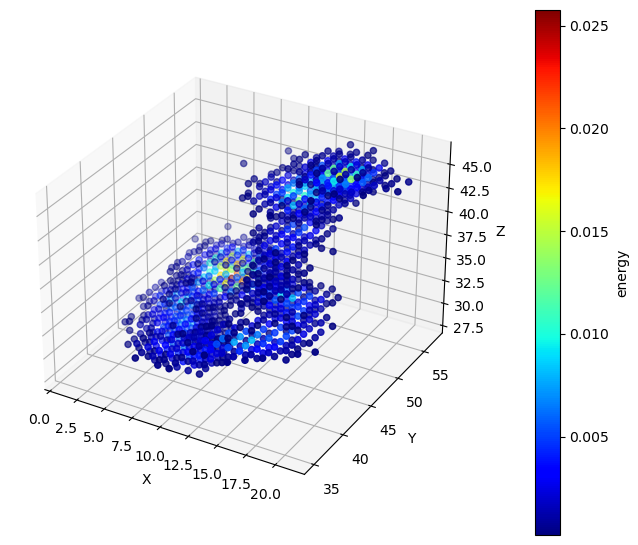

In [41]:
plot_3d_hits(original_event, predicted_event, coords = ['xbin', 'ybin', 'zbin'], cmap = mpl.cm.jet)

### Check energies of some events

In [42]:
f_original = tb.open_file(original_dataset)
df_voxels = pd.DataFrame.from_records(f_original.root['DATASET']['Voxels'][0:20000])

In [43]:
df_voxels.groupby('dataset_id')['energy'].sum().reset_index()

,dataset_id,energy
0,0,1.318428
1,1,0.045591
2,2,1.975215
3,3,1.338611
4,4,2.006219
...,...,...
79,79,0.000862
80,80,0.000189
81,81,0.000252
82,82,0.000234


## Analysis of training results

In [44]:
# Function to load data from HDF5 file
def load_data(filename):
    with tb.open_file(filename, 'r') as h5file:
        data = h5file.root.DATASET.EventPred[:]
        true_labels = data['label']
        probabilities_signal = data['class_1']
        probabilities_background = data['class_0']
    return true_labels, probabilities_signal, probabilities_background

# Function to plot the ROC curve and calculate AUC
def plot_roc_curve(true_labels, probabilities_signal):
    fpr, tpr, _ = roc_curve(true_labels, probabilities_signal)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot probability distributions
def plot_probability_distributions(true_labels, probabilities_signal):
    plt.figure()
    plt.hist(probabilities_signal[true_labels == 1], bins=50, alpha=0.5, label='Signal (True Label = 1)')
    plt.hist(probabilities_signal[true_labels == 0], bins=50, alpha=0.5, label='Background (True Label = 0)')
    plt.xlabel('Predicted Probability for Signal')
    plt.ylabel('Number of Events')
    #plt.title('Probability Distribution for Signal and Background')
    plt.legend(loc='upper right')
    plt.show()

# Function to display confusion matrix at a given threshold
def plot_confusion_matrix(true_labels, probabilities_signal, threshold=0.5):
    predicted_labels = (probabilities_signal >= threshold).astype(int)
    cm = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Background', 'Signal'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold = {threshold})')
    plt.show()

# Main function to run the analysis
def analyze_results(filename):
    true_labels, probabilities_signal, probabilities_background = load_data(filename)

    # Plot ROC curve and calculate AUC
    plot_roc_curve(true_labels, probabilities_signal)

    # Plot the probability distributions of signal and background
    plot_probability_distributions(true_labels, probabilities_signal)

    # Plot confusion matrix at default threshold 0.5
    plot_confusion_matrix(true_labels, probabilities_signal, threshold=0.5)

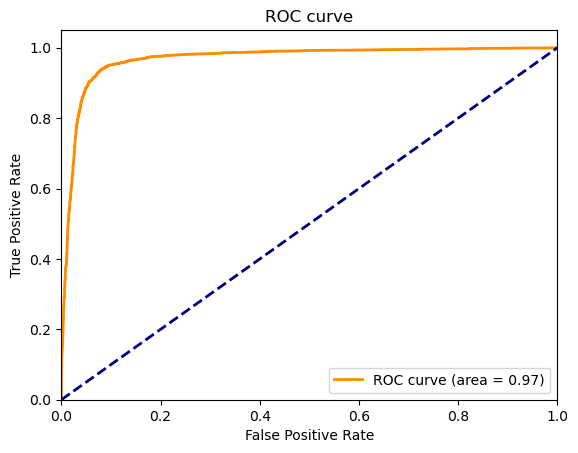

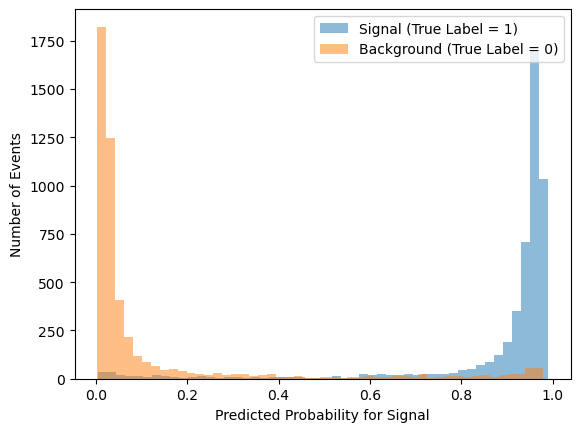

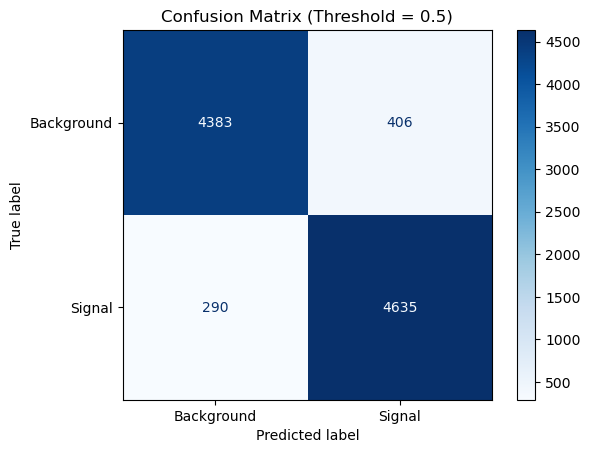

In [45]:
analyze_results(prediction_dataset)